## Asymmetries on line bisectors

In [43]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 12,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }

plt.rcParams.update(params)

In [44]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\Values_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\Values_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown']

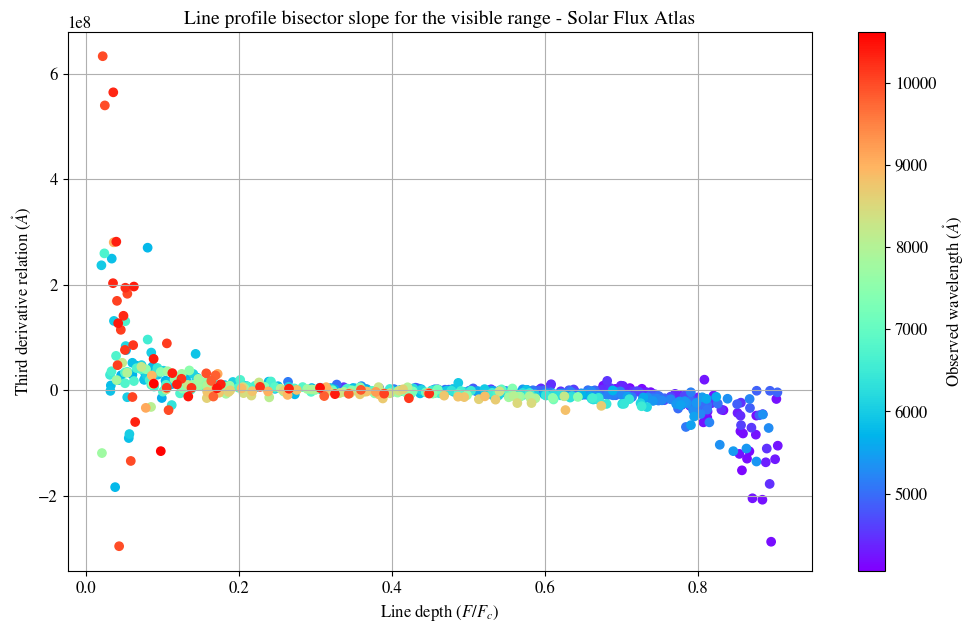

In [45]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Bisector slope'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line profile bisector slope for the visible range - Solar Flux Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax.grid()

# fig1.savefig('Bisector_VIS')

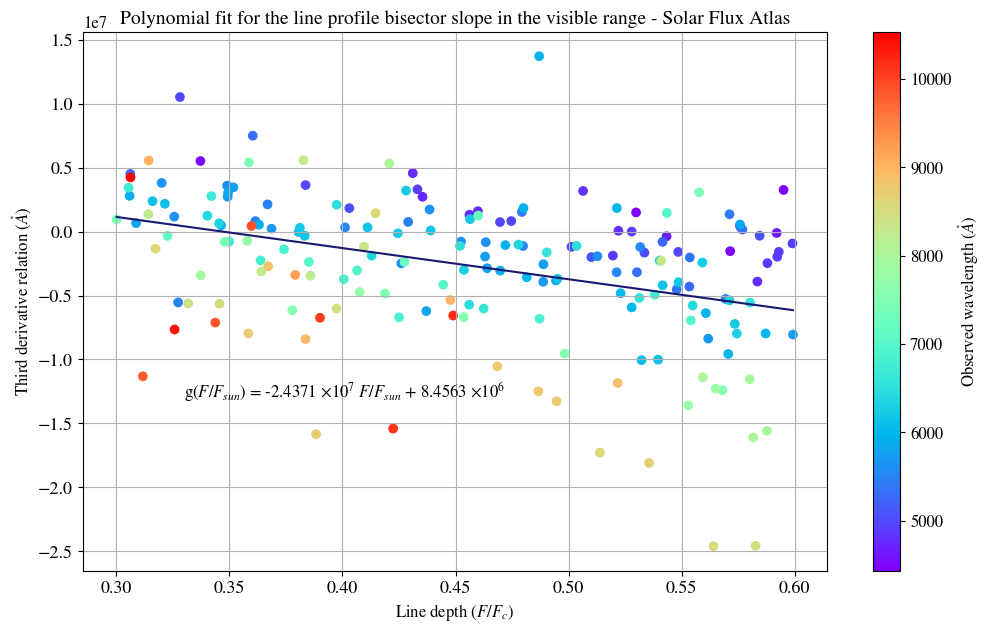

In [46]:
#In the report is given in function of the velocity
values_VIS_standard = VIS_data[VIS_data['Line Depth'].between(0.3,0.6,inclusive='right')]

pol = Polynomial.fit(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_standard['Line Depth']), max(values_VIS_standard['Line Depth']), len(values_VIS_standard['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig2, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Polynomial fit for the line profile bisector slope in the visible range - Solar Flux Atlas')

scatter = ax1.scatter(values_VIS_standard['Line Depth'],values_VIS_standard['Bisector slope'],c=values_VIS_standard["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.33,-1.3e7,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-7,4)} $\times 10^{{7}}$ $F/F_{{sun}}$ + {round(param[0]*1e-6,4)} $\times 10^{{6}}$')
ax1.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

# fig2.savefig('Bisector slope_VIS')

In [47]:
param

array([  8456324.02477333, -24370790.74400778])

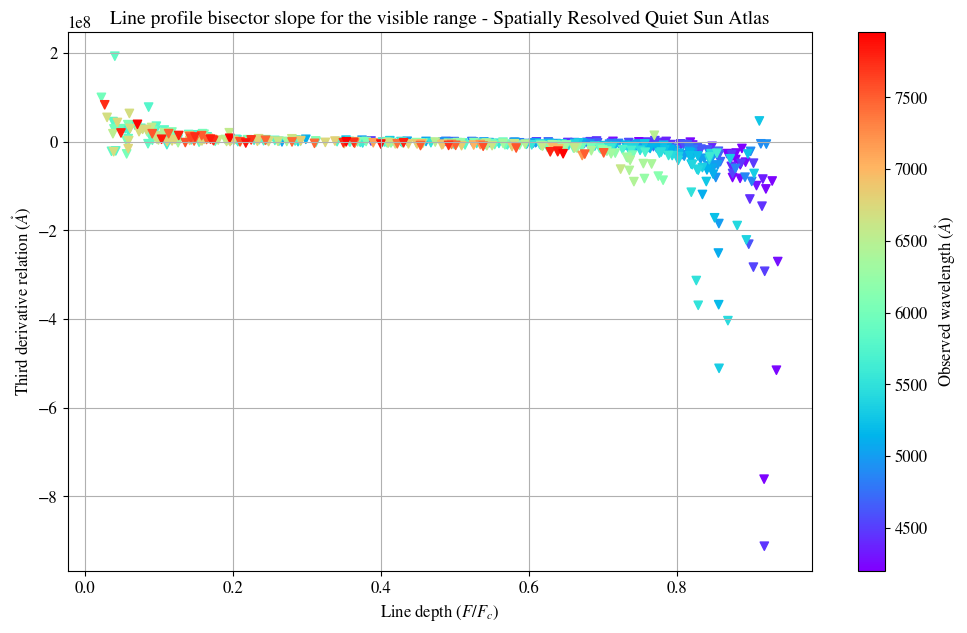

In [48]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Bisector slope'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Line profile bisector slope for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax.grid()

# fig2.savefig('Bisector_SPA')

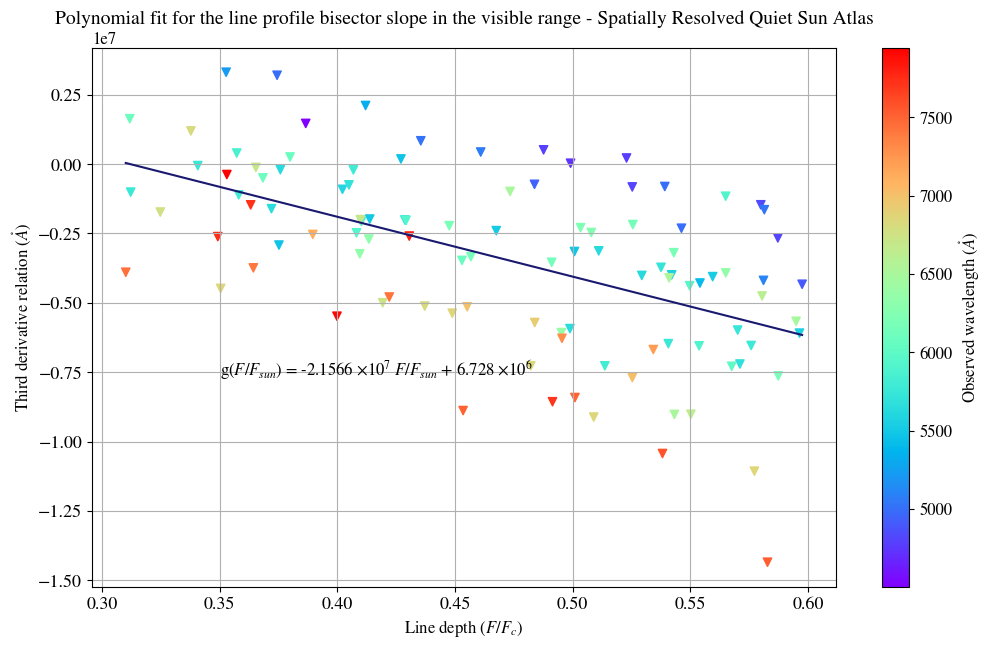

In [49]:
#In the report is given in function of the velocity
values_SPA_slope = SPA_data[SPA_data['Line Depth'].between(0.3,0.6,inclusive='right')]

pol = Polynomial.fit(values_SPA_slope['Line Depth'],values_SPA_slope['Bisector slope'], 1)
param = pol.convert().coef
values_vel = np.linspace(min(values_SPA_slope['Line Depth']), max(values_SPA_slope['Line Depth']), len(values_SPA_slope['Line Depth']))
vel_fit = pol(values_vel)

#Plot for fixed the zero point of velocity
fig3, ax1 = plt.subplots(1,1,figsize=(12,7))

ax1.set_title(r'Polynomial fit for the line profile bisector slope in the visible range - Spatially Resolved Quiet Sun Atlas')

scatter = ax1.scatter(values_SPA_slope['Line Depth'],values_SPA_slope['Bisector slope'],c=values_SPA_slope["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax1.plot(values_vel,vel_fit,c='midnightblue')
ax1.text(0.35,-0.76e7,rf'g($F/F_{{sun}}$) = {round(param[1]*1e-7,4)} $\times 10^{{7}}$ $F/F_{{sun}}$ + {round(param[0]*1e-6,4)} $\times 10^{{6}}$')
ax1.set_ylabel(r'Third derivative relation $(\mathring{A})$')
ax1.set_xlabel(r'Line depth $(F/F_{c})$')
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

# fig3.savefig('Bisector slope_SPA')

In [50]:
param

array([  6727950.02637496, -21566128.90853342])

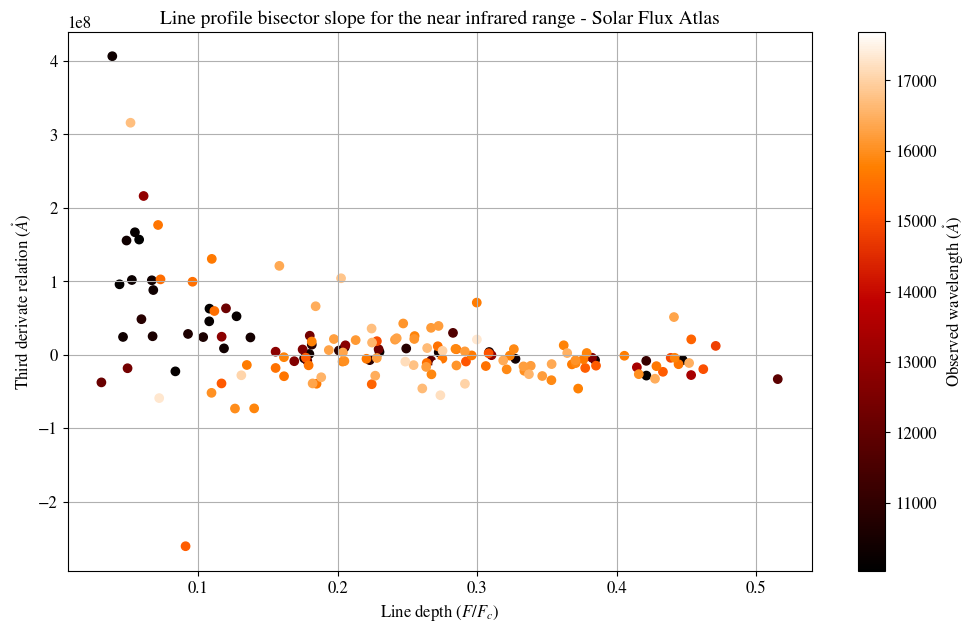

In [51]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Bisector slope'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line profile bisector slope for the near infrared range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Third derivate relation $(\mathring{A})$',fontsize=12)
ax.grid()

# fig3.savefig('Bisector_NIR.pdf')

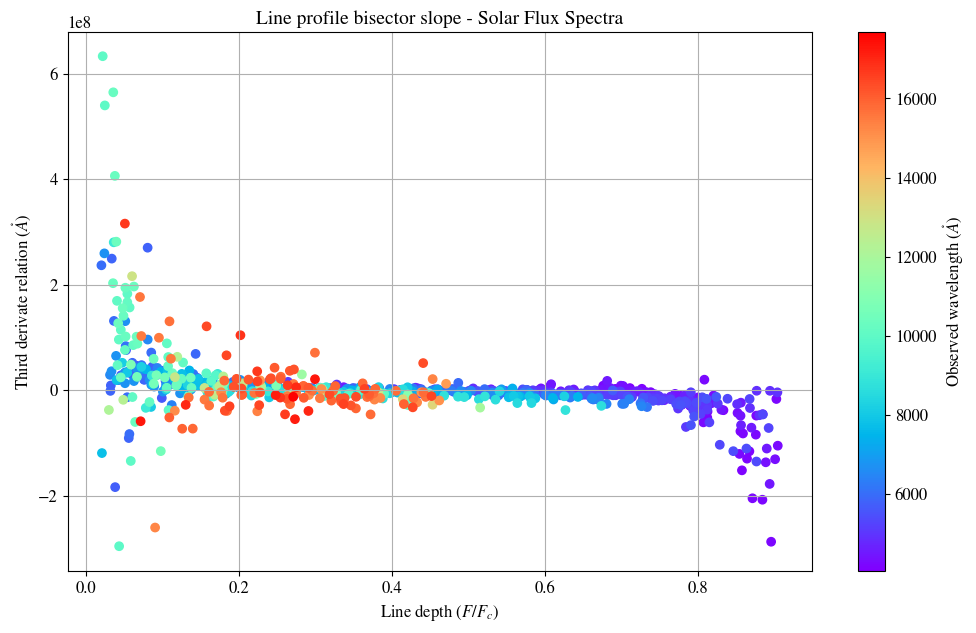

In [52]:
fig4, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(pd.concat([VIS_data['Line Depth'],NIR_data['Line Depth']],axis=0),
                     pd.concat([VIS_data['Bisector slope'],NIR_data['Bisector slope']],axis=0),
                     c=pd.concat([VIS_data["Observed wavelength"],NIR_data["Observed wavelength"]],axis=0),cmap='rainbow',lw=1,marker='o')


cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line profile bisector slope - Solar Flux Spectra',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Third derivate relation $(\mathring{A})$',fontsize=12)

ax.grid()

# fig4.savefig('Bisector_ALL.pdf')